## NLP Tookkit Example

In [20]:
# from google.colab import drive #give colab access to google drive...
# from google.colab import auth
import pandas as pd

# auth.authenticate_user()
# drive.mount('/content/drive')
# thePath = '/content/drive/My Drive/DSE200_Data/'  #somewhere sensible....
thePath = ""

theData = pd.read_csv(thePath + 'amazon.csv')

theData.head()  #peek at first few rows


,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-Resolution-Display-Built/dp/B00QJDU3KY/ref=lp_6669...,I initially had trouble deciding between the paperwhite and the voyage because reviews more or l...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-Resolution-Display-Built/dp/B00QJDU3KY/ref=lp_6669...,Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simp...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-Resolution-Display-Built/dp/B00QJDU3KY/ref=lp_6669...,I am enjoying it so far. Great for reading. Had the original Fire since 2012. The Fire used to m...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-Resolution-Display-Built/dp/B00QJDU3KY/ref=lp_6669...,I bought one of the first Paperwhites and have been very pleased with it its been a constant com...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-Resolution-Display-Built/dp/B00QJDU3KY/ref=lp_6669...,"I have to say upfront - I don't like coroporate, hermetically closed stuff like anything by Appl...",I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


## Load the NLPToolkit

In [21]:
# Import NLTK and download required resources
# !pip install nltk

import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package punkt to /Users/chayan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chayan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/chayan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/chayan/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/chayan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/chayan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

## Let's confirm it works by tokenizing a simple dataset

In [22]:
from nltk.tokenize import word_tokenize

# Tokenize the reviews
theData['tokenized_reviews'] = theData['reviews.text'].apply(word_tokenize)

# Now create lowercase variation of theData['tokenized_reviews']...
# -------------------------

theData['lowercase_reviews'] = theData["tokenized_reviews"].apply(lambda x: [word.lower() for word in x])

# -------------------------
# Display the lowercase tokens
pd.set_option('display.max_colwidth', 100)
theData[['reviews.text', 'lowercase_reviews']].head()


,reviews.text,lowercase_reviews
0,I initially had trouble deciding between the paperwhite and the voyage because reviews more or l...,"[i, initially, had, trouble, deciding, between, the, paperwhite, and, the, voyage, because, revi..."
1,Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simp...,"[allow, me, to, preface, this, with, a, little, history, ., i, am, (, was, ), a, casual, reader,..."
2,I am enjoying it so far. Great for reading. Had the original Fire since 2012. The Fire used to m...,"[i, am, enjoying, it, so, far, ., great, for, reading, ., had, the, original, fire, since, 2012,..."
3,I bought one of the first Paperwhites and have been very pleased with it its been a constant com...,"[i, bought, one, of, the, first, paperwhites, and, have, been, very, pleased, with, it, its, bee..."
4,"I have to say upfront - I don't like coroporate, hermetically closed stuff like anything by Appl...","[i, have, to, say, upfront, -, i, do, n't, like, coroporate, ,, hermetically, closed, stuff, lik..."


## Great so far! Now remove "stop words" and punctuation

Now -- as we did last week, lets get rid of all the words in our text that are no use to us...

In [23]:
import string
from nltk.corpus import stopwords  # Import the stopwords resource from NLTK

# Get English stopwords
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)  #const set of punctuation marks

# Remove stop words and punctuation from theData['lowercase_reviews']
# -----------------------

theData['cleaned_reviews'] = theData['lowercase_reviews'].apply(
    lambda x: [word for word in x if (word not in stop_words and word not in punctuation)]
)

#------------------------
# Show to visually compare our these two variationa...
theData[['reviews.text', 'cleaned_reviews']].head()


,reviews.text,cleaned_reviews
0,I initially had trouble deciding between the paperwhite and the voyage because reviews more or l...,"[initially, trouble, deciding, paperwhite, voyage, reviews, less, said, thing, paperwhite, great..."
1,Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simp...,"[allow, preface, little, history, casual, reader, owned, nook, simple, touch, 2011, 've, read, h..."
2,I am enjoying it so far. Great for reading. Had the original Fire since 2012. The Fire used to m...,"[enjoying, far, great, reading, original, fire, since, 2012, fire, used, make, eyes, hurt, read,..."
3,I bought one of the first Paperwhites and have been very pleased with it its been a constant com...,"[bought, one, first, paperwhites, pleased, constant, companion, suppose, ive, read, average, boo..."
4,"I have to say upfront - I don't like coroporate, hermetically closed stuff like anything by Appl...","[say, upfront, n't, like, coroporate, hermetically, closed, stuff, like, anything, apple, case, ..."


## Remove special chars and drop duplicates



In [24]:
import re


# Function using regex to remove special characters from tokens
def remove_special_chars(text):
    # My note: may want to do this before because previous steps turn "I've" to "'ve" when we arrive here
    cleaned_text = [re.sub(r'\W+', '', word) for word in text if re.sub(r'\W+', '', word) != '']
    return cleaned_text


# Apply the function to remove special characters
theData['cleaned_reviews'] = theData['cleaned_reviews'].apply(remove_special_chars)

# Drop duplicate reviews (if any)
theData.drop_duplicates(subset='reviews.text', keep='first', inplace=True)

# Display the cleaned tokens (without special characters and duplicates)
theData[['reviews.text', 'cleaned_reviews']].head()


,reviews.text,cleaned_reviews
0,I initially had trouble deciding between the paperwhite and the voyage because reviews more or l...,"[initially, trouble, deciding, paperwhite, voyage, reviews, less, said, thing, paperwhite, great..."
1,Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simp...,"[allow, preface, little, history, casual, reader, owned, nook, simple, touch, 2011, ve, read, ha..."
2,I am enjoying it so far. Great for reading. Had the original Fire since 2012. The Fire used to m...,"[enjoying, far, great, reading, original, fire, since, 2012, fire, used, make, eyes, hurt, read,..."
3,I bought one of the first Paperwhites and have been very pleased with it its been a constant com...,"[bought, one, first, paperwhites, pleased, constant, companion, suppose, ive, read, average, boo..."
4,"I have to say upfront - I don't like coroporate, hermetically closed stuff like anything by Appl...","[say, upfront, nt, like, coroporate, hermetically, closed, stuff, like, anything, apple, case, a..."


## We could "stem" our words, reduce by brute force to base form. For example: 'coding'=>'code

In [25]:

from nltk.stem import PorterStemmer

# Initialize the stemmer
stemmer = PorterStemmer()

# Apply stemming to the tokens -- write code to stem theData['cleaned_reviews']
theData['stemmed_reviews'] = theData['cleaned_reviews'].apply(
    lambda x: [stemmer.stem(word) for word in x]
)

# Compare our these two variationa...
theData[['cleaned_reviews', 'stemmed_reviews']].head()


,cleaned_reviews,stemmed_reviews
0,"[initially, trouble, deciding, paperwhite, voyage, reviews, less, said, thing, paperwhite, great...","[initi, troubl, decid, paperwhit, voyag, review, less, said, thing, paperwhit, great, spend, mon..."
1,"[allow, preface, little, history, casual, reader, owned, nook, simple, touch, 2011, ve, read, ha...","[allow, prefac, littl, histori, casual, reader, own, nook, simpl, touch, 2011, ve, read, harri, ..."
2,"[enjoying, far, great, reading, original, fire, since, 2012, fire, used, make, eyes, hurt, read,...","[enjoy, far, great, read, origin, fire, sinc, 2012, fire, use, make, eye, hurt, read, long, nt, ..."
3,"[bought, one, first, paperwhites, pleased, constant, companion, suppose, ive, read, average, boo...","[bought, one, first, paperwhit, pleas, constant, companion, suppos, ive, read, averag, book, eve..."
4,"[say, upfront, nt, like, coroporate, hermetically, closed, stuff, like, anything, apple, case, a...","[say, upfront, nt, like, coropor, hermet, close, stuff, like, anyth, appl, case, amazon, like, d..."


## But 'lemmaization' is more effective -- and contextualized (this code is ready to run)


In [26]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()  #init

# todo: what's going on

# Function to get the correct part-of-speech tag for lemmatization
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)


# Apply lemmatization to the tokens with POS tags
theData['lemma_reviews'] = theData['cleaned_reviews'].apply(
    lambda x: [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in x])
theData[['reviews.text', 'lemma_reviews']].head()


,reviews.text,lemma_reviews
0,I initially had trouble deciding between the paperwhite and the voyage because reviews more or l...,"[initially, trouble, decide, paperwhite, voyage, review, less, say, thing, paperwhite, great, sp..."
1,Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simp...,"[allow, preface, little, history, casual, reader, own, nook, simple, touch, 2011, ve, read, harr..."
2,I am enjoying it so far. Great for reading. Had the original Fire since 2012. The Fire used to m...,"[enjoy, far, great, reading, original, fire, since, 2012, fire, use, make, eye, hurt, read, long..."
3,I bought one of the first Paperwhites and have been very pleased with it its been a constant com...,"[bought, one, first, paperwhites, pleased, constant, companion, suppose, ive, read, average, boo..."
4,"I have to say upfront - I don't like coroporate, hermetically closed stuff like anything by Appl...","[say, upfront, nt, like, coroporate, hermetically, close, stuff, like, anything, apple, case, am..."


## Sentiment analysis

We will use the VADAR library to calculate sentiment from our dataset.  

> `compound_score` is overall sentiment <BR>
  `sentiment` classifies rows 'positive','negative' or 'neutral'

In [27]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

theSentimeter = SentimentIntensityAnalyzer()  #init me

# todo: looks wrong

# --- 1. get polarity_scores for theData['lemma_reviews'] ---

theData['sentiment_scores'] = theData['lemma_reviews'].apply(
    lambda review: theSentimeter.polarity_scores(' '.join(review))
)

# --- 2. # Extract just compound value from sentiment score (overall sentiment)

theData['compound_score'] = theData['sentiment_scores'].apply(
    lambda score_dict: score_dict['compound']
)

# --- 3. # Categorize based on compound score: POS: > 0.7, NEG: < 0.4 else NEUTRAL

theData['sentiment'] = theData['compound_score'].apply(
    lambda x: 'positive' if x >= 0.8 else ('negative' if x <= 0.3 else 'neutral')
)

# Display reviews with their sentiment
theData[['tokenized_reviews', 'sentiment_scores', 'compound_score', 'sentiment']].head()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/chayan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,tokenized_reviews,sentiment_scores,compound_score,sentiment
0,"[I, initially, had, trouble, deciding, between, the, paperwhite, and, the, voyage, because, revi...","{'neg': 0.058, 'neu': 0.703, 'pos': 0.238, 'compound': 0.9648}",0.9648,positive
1,"[Allow, me, to, preface, this, with, a, little, history, ., I, am, (, was, ), a, casual, reader,...","{'neg': 0.073, 'neu': 0.695, 'pos': 0.231, 'compound': 0.9777}",0.9777,positive
2,"[I, am, enjoying, it, so, far, ., Great, for, reading, ., Had, the, original, Fire, since, 2012,...","{'neg': 0.266, 'neu': 0.422, 'pos': 0.312, 'compound': 0.34}",0.3400,neutral
3,"[I, bought, one, of, the, first, Paperwhites, and, have, been, very, pleased, with, it, its, bee...","{'neg': 0.042, 'neu': 0.774, 'pos': 0.184, 'compound': 0.9666}",0.9666,positive
4,"[I, have, to, say, upfront, -, I, do, n't, like, coroporate, ,, hermetically, closed, stuff, lik...","{'neg': 0.059, 'neu': 0.622, 'pos': 0.319, 'compound': 0.9946}",0.9946,positive


## And finally, one more visualization tool to show final result

In [28]:
!pip install wordcloud

# Import required libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#  Get all the words from theData['lemma_reviews'] and make word cloud...

# WRITE ME...
# theReviews = ''.join([''.join(review) for review in theData['reviews.text']])

theCloud = WordCloud(width=800, height=400, background_color='white').generate( ????? )

# Present the cloud...



SyntaxError: invalid syntax (3197470163.py, line 12)

## Ok, that's cool -- but what products were they referring to?

Let's build a cloud using this approach:

- We iterate through each row of our DataFrame
- We use pos_tag to identify proper nouns (likely product names) within the lemma_reviews column
- We store these product names along with their cumulative sentiment scores in the product_sentiment dictionary


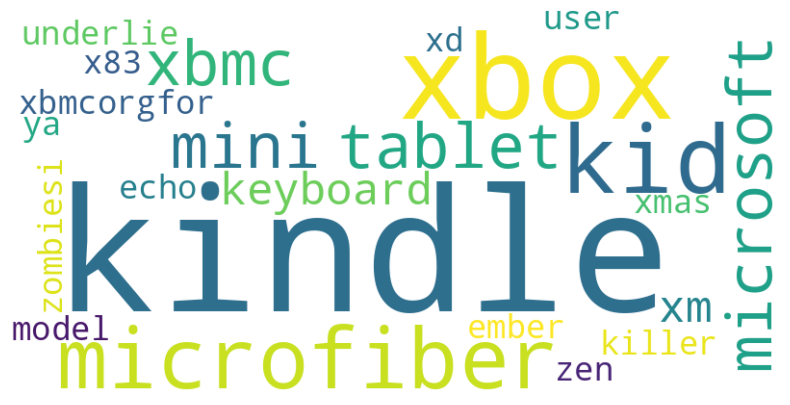

In [17]:
import nltk
from nltk.corpus import wordnet
from nltk.tag import pos_tag

# Last challenge.

# Some of the words in the theData['lemma_reviews'] refer to products.
# How would you find "product related words" -- and make a wordcloud
# for just them, making scale of the word related to overall use in text?

# --- Write me ----


